In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
n_comps = 2

In [3]:
data = "data/norm3d.csv"
df = pd.read_csv(data, delimiter=",")
print(df.shape)
print(df.info())
display(df.head())

(600, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   class   600 non-null    float64
 1   x       600 non-null    float64
 2   y       600 non-null    float64
 3   z       600 non-null    float64
dtypes: float64(4)
memory usage: 18.9 KB
None


,class,x,y,z
0,1.0,2.760303,-0.192315,-0.866662
1,1.0,-0.925875,-0.114893,1.969504
2,1.0,-0.403968,0.115090,0.456181
3,1.0,0.916904,1.044882,-2.086409
4,1.0,1.760680,-0.621372,1.334179


In [4]:
df_X = df.loc[:,"x":"z"]
obj = df['class']
display(df_X.head())

,x,y,z
0,2.760303,-0.192315,-0.866662
1,-0.925875,-0.114893,1.969504
2,-0.403968,0.115090,0.456181
3,0.916904,1.044882,-2.086409
4,1.760680,-0.621372,1.334179


In [5]:
sc = StandardScaler()
X = sc.fit_transform(df_X) 

Text(0, 0.5, 'PCA2')

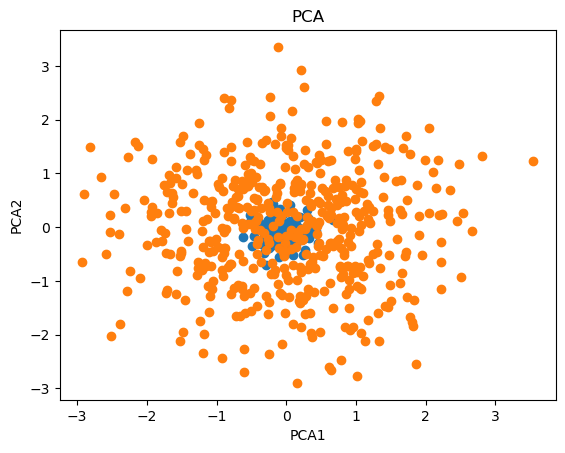

In [6]:
n=X.shape[0]
Y = PCA(n_components=n_comps).fit_transform(X*(np.sqrt(n-1))/(np.sqrt(n)))
plt.title("PCA")
y1 = Y[ obj==1 ]
y2 = Y[ obj==2 ]
plt.scatter(y1[:, 0], y1[:, 1])
plt.scatter(y2[:, 0], y2[:, 1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0.5, 1.0, 't-SNE: perplexity 50')

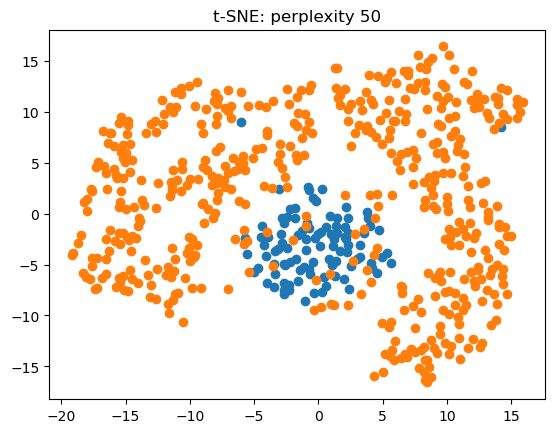

In [7]:
Y = TSNE(n_components=n_comps, perplexity=50, random_state=5).fit_transform(X)
y1 = Y[ obj==1 ]
y2 = Y[ obj==2 ]
plt.scatter(y1[:, 0], y1[:, 1])
plt.scatter(y2[:, 0], y2[:, 1])
plt.title("t-SNE: perplexity {}".format(50))